# From Machine Learning to Neural Networks

In the first module of this course, you already discussed the problem of image reconstruction from measurements acquired via linear operators. In this module, we will approach the same problem from a different perspective, i.e. solving inverse problem of recovering an unknown image from (noisy) measurement by employing **neural networks**.

In this first section, we will begin by introducing basic concepts of classical Machine Learning-such as the concepts of *linearity*, *parameters* and *regression*. Then, we will introduce *neural networks* as a sub-class of Machine Learning, and we will underline its main properties. Implementation will be provided in the next section.

![](/imgs/hybrid.png)

## Basics of Machine Learning
A *learning problem* is a setup where we want to extract knowledge from a set of $N$ datapoints $\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots,  (x^{(N)}, y^{(N)}) \}$, previously collected, where for any $i = 1, \dots, N$, an input-output pairs is provided. Think of the **input data** $x^{(i)} \in \mathbb{R}^d$ as the information available, associated with the **output data** $y^{(i)} \in \mathbb{R}^s$, which represent the variable we want to predict. The input dimension, $d$, is the number of information available as input, while the output dimension $s$ is the amount of variable we want to predict. For simplicity, these information are usually collected into vectors of shape $d$ and $s$, respectively.

For example, ...

```{warning}
Note that this construction assumes that all the information is provided in the form of real numbers (as both $x^{(i)}$ and $y^{(i)}$ are real vectors). Handling problems with non-numeric data is out of the scope of this course, but we refer the curious reader to the topic of *embedding* of categorical variables [CITARE].
```

The task of a Machine Learning (ML) model is to extract the knowledge from the given data, understanding its pattern, and use this information to model the mapping from input to output, with the intention of predicting future outcomes of the same phenomenon. Mathematically, a ML model is a *function* $f_\Theta: \mathbb{R}^d \to \mathbb{R}^s$, mapping an **input vector** of length $d$ to an **output vector** of length $s$. The output dimension, $s$, depends on the application:

- if the model is used to **classify** the input image in one of possible $k$ classes, then usually $s = k$;
- if the model is used for a **regression** task, then $s$ is the number of output features;
- if the model is used for **image reconstruction**, then usually $s = n$, i.e. the shape of the reconstructed image.

The model **knowledge** is contained in the vector $\Theta$ representing its *parameters*. To better understand the role of parameters in a ML model, let's begin with a simple experiment with Linear Regression.

Consider a simple model $f_\Theta$ with only two parameters, namely $\Theta_1$ and $\Theta_2$, as follows:

$$
f_\Theta(x) = \Theta_1 + \Theta_2 x,
$$

which represents a **straight line** with quote $\Theta_1$ and slope $\Theta_2$.

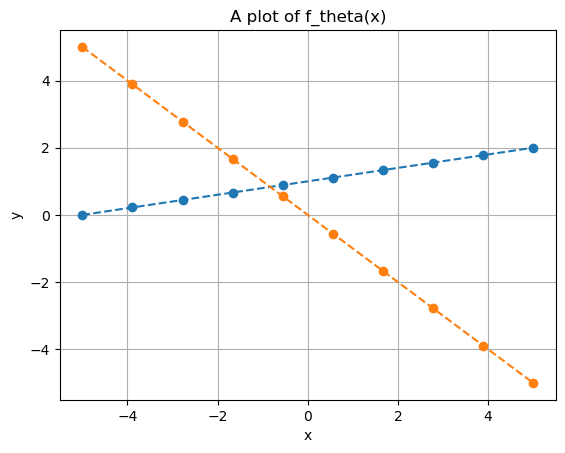

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

Think of $x$ as an input data, which we want to use to predict an output $y$, and note how different combination of $\Theta$ lead to very different predictions.

Now, superimpose the available data to the same plot:

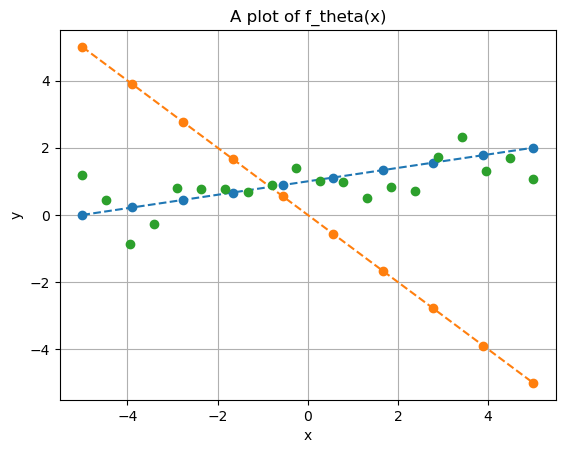

In [3]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

*Which of the two straight lines better fit the data provided?*
Clearly, the blue line, the one parameterized by $\Theta = (1, 0.2)$. Indeed looking in detail on the code I used to generate the data, it can be noticed that $(1, 0.2)$ is actually the parameters that defines $y^{(i)}$.

This observation is to describe the two main features, common for basically every ML model:

- Different choice of parameters $\Theta$ lead to **very different** predictions,
- Given *training set*, some parameter choices are better than other, and usually there is one choice which is **optimal**. A good model should be able to at least approximate the optimal parameter choice.

The process of selecting the optimal parameters for a ML model given a training set is called **training**. We will come back later to the task of training a model and how it is usually performed.

### Linearity
Note that the example above assumes that both the input and output dimensions $d$ and $s$ are equal to 1. A linear regression model can be easily generalized to dimensions $d > 1$, $s>1$ by simply consider the general linear model:

$$
f_\Theta(x) = W x + b,
$$

where there parameters $\Theta = \{ W, b \}$ have dimensions $W \in \mathbb{R}^{s \times d}$, $b \in \mathbb{R}^s$. Note that this implies that the total number of parameters to be setted equals to $s(d+1)$, i.e. it grows linearly with the input and output dimension.

Clearly, the output of this model with $d>1$ and $s>1$ cannot be visualized in a plot, as it would require at least 4 dimensions.

While linear models have multiple interesting properties (which, again, are beyond the scope of this course), their **expressivity**-i.e. the ability of approximating complicated output- is limited, as linear model can only represents *linear functions*-straight lines, planes, .... As a consequence a linear model cannot even approximate well functions such as $\sin(x)$, and their use for real, complex data such as images, or even language, is limited.

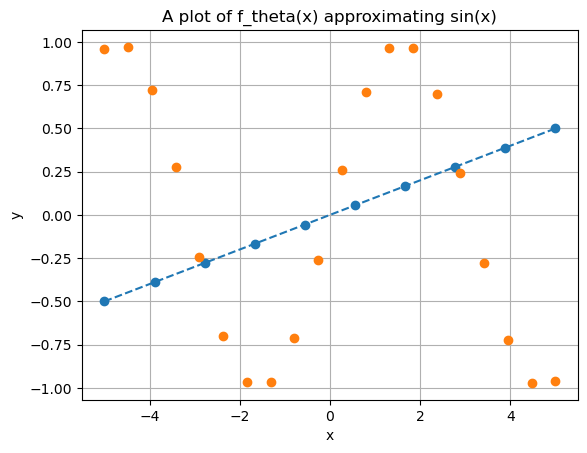

In [5]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = np.sin(x_data)

# Create a linear model approximation
xx = np.linspace(-5, 5, 10)
theta = (0, 0.1)
yy = f(theta, xx)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x) approximating sin(x)")
plt.show()

To this aim, multiple ML algorithm have been proposed in literature, where the most succesful are: Polynomial Regression, Support Vector Machines (SVM), Random Forest (RF), and XGBoost. 

However, while they have shown superior predictive performance compared to linear models, none of them is expressive enough to well approximate highly complicated data, as we need for image reconstruction tasks. 

## Neural networks
A neural network is a particular type of Machine Learning (ML) model, which became particularly relevant in the last few years due to multiple reasons, which includes:

- the exponential increase in computational power, and in particular of GPUs, which allowed extreme *parallelization*, a key advantage of neural networks compared to other Artificial Intelligence (AI) methods;
- the huge amount of data available thanks to internet.

In this section, we will briefly discuss in great generality what a neural network is. We will then dive into more details on neural networks specifically designed for image processing. For a deeper understanding on neural networks please refer either to the course of professor Andrea Asperti or to [CITARE].

### Stacking multiple linear functions
The basic idea of neural networks if fairly simple: linear models are great and efficient, but not expressive enough, why don't just stacking multiple linear models one in top of the other to improve the expressivity?

For example, consider two linear models:

$$
f^1_{\Theta^1}(x) = W^1 x + b^1, \\
f^2_{\Theta^2}(x) = W^2 x + b^2, \\
$$

and consider the model $f_\Theta(x)$ obtained by concatenating the two models so that the output of the first is given as input to the second, that is:

$$
f_\Theta(x) := (f_{\Theta^2} \circ f_{\Theta^1})(x) = f_{\Theta^2} ( f_{\Theta^1} (x)).
$$

Maybe this way we obtain a more flexible model? **Unfortunately, not.**

Indeed, it is not hard to show that:

$$
\begin{aligned}
f_\Theta(x) &= f_{\Theta^2} ( f_{\Theta^1} (x)) = f_{\Theta^2} (W^1 x + b^1) \\ &= W^2(W^1 x + b^1) + b^2 = W^2 W^1 x + W^2b^1 + b^2.
\end{aligned}
$$

If we re-name $W := W^2 W^1$ and $b := W^2b^1 + b^2$, we get:

$$
f_\Theta(x) = W x + b,
$$

which proves that *stacking multiple linear models one after the other, the resulting model is still a linear model*. This is not surprising, as being *close by composition* is a key property of linear functions.

### Non-linear activation functions
Consequently, to build a model which is more expressive than a linear model, we cannot simply stack multiple copies of them, but we also need something to break the linearity. In neural networks, the solution adopted is fairly easy: why don't we just insert simple non-linear functions in between two linear models to break the linearity?

In particular, consider a simple function like:

$$
\rho(x) = \max(0, x),
$$

whose plot is as follows:

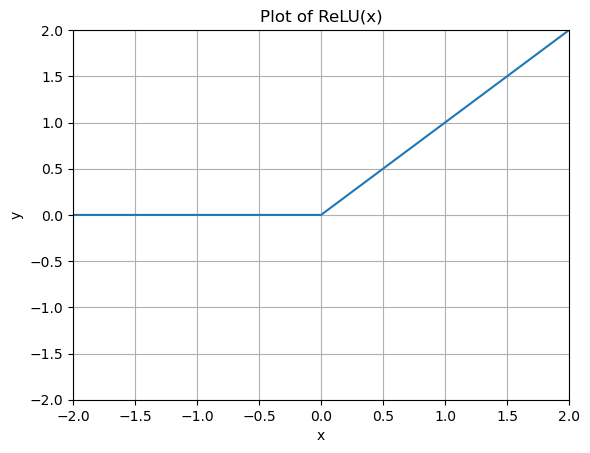

In [9]:
# Define ReLU
def ReLU(x):
    return np.maximum(0, x)

# Define x
x = np.linspace(-5, 5, 21)
y = ReLU(x)

# Plot
plt.plot(x, y, '-')
plt.grid()
plt.title("Plot of ReLU(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

Re-define the model $f_\Theta$ as above, but inserting $\rho(x)$ in between the two linear models $f_{\Theta^1}$ and $f_{\Theta^2}$:

$$
f_{\Theta}(x) := f_{\Theta^2} ( \rho (f_{\Theta^1} (x))) = W^2(\rho(W^1x + b^1) + b^2).
$$

Surprisingly, while this simple modification does not seem to really alter the structure of the stacked linear model discussed above, it shows an incredible property: $f_\Theta(x)$ can approximate *arbitrarly well* any continuous function, thus exhibiting **Universal Approximation** property. This model, originally called Multi-layer Perceptron (MLP) due to its layered structure, is the simplest version of a *neural network*.

As we will see in the following, more advanced versions of neural networks can be simply obtained by:
- stacking more linear models (always placing a non-linear function in between them), 
- changing the non-linear function employed,
- limiting the structure of the parameter matrices $W^l$ to allow for more efficient computation (this is particularly important for image reconstruction).

### Notations
To conclude this introductory section, we 

![](/imgs/MLP.png)